<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%2011/MIS710_Lab11_Topic_Modelling_Solution_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lab 11 Week 11: Solution**
Author: Associate Professor Lemai Nguyen

Objectives: 
1. To learn text analytics and NLP basics
2. To apply the basic skills on the well-known Internet Movie Database developed by Stanford researcher Andrew Maas.
3. To apply the basic skills on another review dataset.
4. To learn basic MLOps: saving your model and loading and using it later. 

Note: There is a separate MIS710_Lab10_NLP_Deployment where you can load the saved model and apply it to make predictions. 



# **1. Import Libraries and Functions**

Import libraries and functions that are central to this lab**

In [ ]:
# import libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Case One: ChatGPT tweets**

**Topic Modelling**


**Context**

ChatGPT has reached 100 million users just two months after launching. There is a huge debate on general trends and concerns surrounding AI and language models. A diverse range of opinions and viewpoints is emerging.

**Content**

The lab dataset is a cutdown version of a kaggle dataset of 100,000 tweets in English containing the word "chatgpt" between 2023-03-18 and 2023-03-21.

The Lab dataset consists of Processed tweet and Sentiment lables.

**Inspiration**

Applying topic modelling on datasets like Tweets can provide valuable insights into the opinions and attitudes towards ChatGPT. It's not uncommon for opinions to be divided or for individuals to have mixed feelings about a new technology or innovation.

**Data source**:

https://www.kaggle.com/datasets/sanlian/tweets-about-chatgpt-march-2023


## **4.1 Data Loading**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/chatgpt-tweets.csv'


In [ ]:
# load dataset
records = pd.read_csv(url, index_col=None)

In [ ]:
records.head()

,processed_tweet,sentiment_label
0,chatgpt is another woke machine.,negative
1,"of the atlantic, or only near the atla more to...",neutral
2,this thread is saved to your notion database. ...,neutral
3,prompt ai – chatgpt,neutral
4,just had some interesting conversations with g...,positive


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80501 entries, 0 to 80500
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processed_tweet  80500 non-null  object
 1   sentiment_label  80501 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## **4.2. Text and Languistic Preprocessing**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


**Detect missing data**

In [ ]:
records.isnull().sum()

processed_tweet    1
sentiment_label    0
dtype: int64

In [ ]:
# Drop rows with missing data in the 'Age' column
records.dropna(subset=['processed_tweet'], inplace=True)

In [ ]:
records.isnull().sum()

processed_tweet    0
sentiment_label    0
dtype: int64

### **EDA**

* Analyse and visualise the sentiment column

In [ ]:
# Get frequency of positive and negative reviews
sentiment_counts = records['sentiment_label'].value_counts()
print(sentiment_counts)

neutral     40618
negative    20911
positive    18971
Name: sentiment_label, dtype: int64


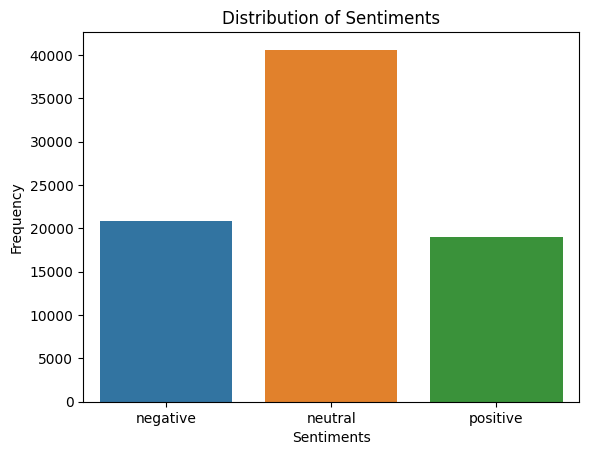

In [ ]:
# Plot bar chart of sentiment counts
sns.countplot(data=records, x='sentiment_label')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.show()

### **Text pre-processing**
* Text cleaning: Remove any HTML tags, punctuation, and special characters from the reviews.
* Lowercasing: Convert all text to lowercase to ensure that words with the same spelling but different capitalization are treated as the same word.
* Tokenization: Split the text into individual words or tokens.
* Stopword removal: Remove common words such as "the", "and", "a", etc. that do not add much meaning to the text.
* Stemming/Lemmatization: Reduce words to their base form to normalize the text and group together words with similar meanings.

re is a built-in Python module for working with regular expressions. Regular expressions are a combination of alphanumeric characters and special characters. For example, the . character in a regular expression matches any single character, while the * character matches zero or more occurrences of the preceding character.

#### **Text cleaning**

In [ ]:
import re

The re.sub() method takes three arguments:

1.   The regular expression pattern to search for.
2.   The replacement string to use for each match of the pattern.
3. The input string to perform the substitution on.

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  # Remove the string 'nan' from column "Text", as we merged columns with missing texts together
  text = re.sub(r'nan', '', text)
  return text

* The . (dot) metacharacter matches any single character except for a newline character. 
* The * (asterisk) metacharacter matches zero or more occurrences of the preceding character or group. 

* \w matches any word character, which  includes all alphabetic characters (both upper- and lowercase) and digits, and the underscore character.

* \s matches any whitespace character, which includes spaces, tabs, newlines, and other types of whitespace.

* \s+ matches one or more consecutive whitespace characters. The + (plus) is a metacharacter that means "one or more occurrences of the preceding pattern".

**Task 13:** Write code for records['Review'] to apply clean_text

In [ ]:
# Apply the clean_text function to the 'review' column 
records['processed_tweet'] = records['processed_tweet'].apply(clean_text)

In [ ]:
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

**Task 14:** Write code for records['Review'] to apply lowercasing

In [ ]:
records['processed_tweet']=records['processed_tweet'].apply(lowercasing)

#### **Tokenization, Stemming and Lemmatization**

* Tokenization breaks the text into individual words or tokens, and then stemming/lemmatization is applied on each token individually to obtain their root form.

* Stemming can help in reducing  words to their root form, which can help in reducing the number of unique words and therefore reducing the size of the vocabulary. For example: studies, study, studied, studying -> study

* Lemmatization reduces a word to its base or dictionary form, which can improve the accuracy of the analysis. By doing both stemming and lemmatization, we can get the benefits of both techniques and improve the overall performance of the sentiment analysis model.

NLTK (Natural Language Toolkit) is a Python library used for natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

Punkt and WordNet are both modules in the Natural Language Toolkit (nltk) library in Python for natural language processing tasks.

* Punkt is a module used for tokenization. The Punkt module is trained on large corpora and uses unsupervised learning algorithms to tokenize sentences effectively even when presented with challenging text.

* WordNet is a large lexical database of English words for lemmatization.

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Get stopwords
stop_words = set(stopwords.words('english'))
#keep negation words because removing them may result in information loss
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}

filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization, stemming and lemmatization
def tokenize_stem_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text.lower())
    
  #initialize stemmer and lemmatizer  
  stemmer = PorterStemmer()
  #lemmatizer = WordNetLemmatizer()

  #perform stemming and lemmatization 
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  #lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in filtered_words and token.lower() not in negation_words]
  #return ' '.join(lemmatized_tokens)
  return stemmed_tokens

In [ ]:
# Tokenize, stem, and lemmatize the text
processed_text = records['processed_tweet'].apply(tokenize_stem_lemmatize)


In [ ]:
records['processed_text'] = records['processed_tweet'].apply(tokenize_stem_lemmatize)

## **4.3 Topic modelling using LDA**

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

In [ ]:
# Create a list of preprocessed reviews
preprocessed_text = records['processed_text'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Create the document-term matrix using TF-IDF vectorization
vectorizer = TfidfVectorizer()
doc_term_matrix = vectorizer.fit_transform(preprocessed_text)


In [ ]:
# Define the number of topics
num_topics = 20

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=2023)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=20, random_state=2023)

In [ ]:
# Print the topics and their top words
feature_names = vectorizer.get_feature_names_out() 
for topic_id, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {topic_id + 1}: {' '.join(top_words)}")

Topic 1: chatgpt chatgpt4 know chat gpt question data wrong ai using
Topic 2: chatgpt ai prompt content use using tool like business help
Topic 3: chatgpt rsi emo_pos powered alternative recommendation price last ticker candle
Topic 4: chatgpt written chat history bug poem dear tweet cool user
Topic 5: chatgpt source escape ai copy le genie 600 stanford thats
Topic 6: chatgpt ask job replace ai could make replaced list like
Topic 7: chatgpt apple ai siri like gm watch app human using
Topic 8: chatgpt run chat murderer say gpt transform elon ai college
Topic 9: chatgpt chat gpt real president get asked estate seriously use
Topic 10: thank seo chatgpt kill ban guide asked via calculator ai
Topic 11: chatgpt plus use know even user outage congrats via get
Topic 12: chatgpt ceo sam altman ai openai scared eliminate job little
Topic 13: chatgpt ai use tool like using new chat help amp
Topic 14: chatgpt good morning wrote like chat use gpt ai okay
Topic 15: gpt4 chatgpt arb model language ap

In [ ]:
lda_model.components_.shape

(20, 44576)

In [ ]:
 # Find the top reviews and labels associated with the current topic
topic_tweets = []
topic_labels = []
topic_probabilities = lda_model.transform(doc_term_matrix)[:, topic_id]
top_tweets_indices = topic_probabilities.argsort()[:-6:-1]
for tweet_index in top_tweets_indices:
  topic_tweets.append(records['processed_tweet'][tweet_index])
  topic_labels.append(records['sentiment_label'][tweet_index])
    


In [ ]:
# Print the top reviews and labels for the current topic
for tweet, label in zip(topic_tweets, topic_labels):
  print(f"Tweet: {topic_tweets}")
  print(f"Label: {topic_labels}")
  print()

Tweet: ['that is called misusing technology maybe you are new to it do you think chatgpt speaks better than the facts on the ground derejes comments are based on the current reality', 'still dismissing tiktok as something for the kids shortform video content created by chatgpt is exploding right now spitting image ohara tice the efl sinn fein wigan athletic spring network rail scampton', 'chatgpt is the new svb in my twitter feed', 'i think this tweet actually sums you up as a person quite nicely you were a tomboy so anyone who feels differently about their body must be feeling the same thing you did just a complete sociopathic lack of empathy or understanding of other people', 'chatgpt secret weapon steps to start writing and selling books within hours spitting image ohara tice the efl sinn fein wigan athletic spring network rail scampton']
Label: ['negative', 'neutral', 'neutral', 'negative', 'neutral']

Tweet: ['that is called misusing technology maybe you are new to it do you think

In [ ]:
for topic_id, topic in enumerate(lda_model.components_):
  top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
  print(f"Topic {topic_id + 1}: {' '.join(top_words)}")
  print("Top Reviews and Labels:")
    
  # Find the top reviews and labels associated with the current topic
  topic_tweets = []
  topic_labels = []
  topic_probabilities = lda_model.transform(doc_term_matrix)[:, topic_id]
  top_tweets_indices = topic_probabilities.argsort()[:-6:-1]
  for tweet_index in top_tweets_indices:
    topic_tweets.append(records['processed_tweet'][tweet_index])
    topic_labels.append(records['sentiment_label'][tweet_index])
    
  # Print the top reviews and labels for the current topic
  for tweet, label in zip(topic_tweets, topic_labels):
    print(f"Tweet: {topic_tweets}")
    print(f"Label: {topic_labels}")
    print()
        
  print("----------------------")

Topic 1: chatgpt know chatgpt4 gpt chat gpt4 even whats like im
Top Reviews and Labels:
Tweet: ['im surprised at how many people around me either arent using or dont even know about chatgpt or gpt4 ive been in a bubble where i just assumed the whole world was using it but the majority of the world is not a lot of people are going to be behind the curve soon', 'chelseas best x11 according to ai formation 433 goalkeeper petr cech defenders paulo ferreira john terry marcel desailly ashley cole midfielders frank lampard claude makelele gianfranco zola forwards didier drogba kerry dixon eden hazard', 'alas its important for msft to lead this conversation and ride the ai wave as much as possible were 3 months in since chatgpt was made public and none of the faang made any notable product announcement just coulda woulda talk', 'ok chatgpt youre losing the thread again', 'the best movies of all time according to chat gpt 1 the godfather 1972 2 the godfather part ii 1974 3 the dark night 2008 4

In [ ]:
# Perform topic modeling and count the number of reviews per topic
topic_counts = [0] * num_topics
topic_tweets = [[] for _ in range(num_topics)]
label_counts = [[0, 0, 0] for _ in range(num_topics)]  # [positive, negative, neutral]

for tweet_index, tweet in enumerate(doc_term_matrix):
    topic_probabilities = lda_model.transform(tweet)
    top_topic = topic_probabilities.argmax()
    topic_counts[top_topic] += 1

    label = records['sentiment_label'][tweet_index]
    if label == 'positive':
        label_counts[top_topic][0] += 1
    elif label == 'negative':
        label_counts[top_topic][1] += 1
    elif label == 'neutral':
        label_counts[top_topic][2] += 1

In [ ]:
# Create a list of topic indices sorted by count in descending order
sorted_topics = sorted(range(num_topics), key=lambda i: topic_counts[i], reverse=True)
sorted_topics

[15, 1, 12, 10, 0, 6, 5, 18, 13, 14, 4, 16, 3, 11, 7, 8, 9, 2, 17, 19]

In [ ]:
# Print the topics and their counts, sorted by the number of reviews in each topic
for topic_id in sorted_topics:
    count = topic_counts[topic_id]
    print(f"Topic {topic_id + 1}: {count} tweets")

    pos_count, neg_count, neu_count = label_counts[topic_id]
    print(f"Topic {topic_id + 1}: {count} tweets")
    print(f"Positive reviews: {pos_count}")
    print(f"Negative reviews: {neg_count}")
    print(f"Neutral reviews: {neu_count}")
    print("----------------------")

Topic 16: 12139 tweets
Topic 16: 12139 tweets
Positive reviews: 2530
Negative reviews: 3906
Neutral reviews: 5703
----------------------
Topic 2: 11084 tweets
Topic 2: 11084 tweets
Positive reviews: 3244
Negative reviews: 2413
Neutral reviews: 5427
----------------------
Topic 13: 10373 tweets
Topic 13: 10373 tweets
Positive reviews: 2936
Negative reviews: 2347
Neutral reviews: 5090
----------------------
Topic 11: 4434 tweets
Topic 11: 4434 tweets
Positive reviews: 703
Negative reviews: 1418
Neutral reviews: 2313
----------------------
Topic 1: 4091 tweets
Topic 1: 4091 tweets
Positive reviews: 781
Negative reviews: 1257
Neutral reviews: 2053
----------------------
Topic 7: 3955 tweets
Topic 7: 3955 tweets
Positive reviews: 969
Negative reviews: 986
Neutral reviews: 2000
----------------------
Topic 6: 3795 tweets
Topic 6: 3795 tweets
Positive reviews: 760
Negative reviews: 988
Neutral reviews: 2047
----------------------
Topic 19: 3693 tweets
Topic 19: 3693 tweets
Positive reviews: 7

## **4.4 Using Word2Vec and clustering**

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [ ]:
tokenized_tweets = processed_text

In [ ]:
# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_tweets, window=5, min_count=1)

# Get the tweet embeddings
#tweet_embeddings = [word2vec_model.wv[tokens] for tokens in tokenized_tweets]



In [ ]:
# Get the tweet embeddings
tweet_embeddings = []
for tokens in tokenized_tweets:
    # Compute the average of word vectors for each tweet
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        tweet_embeddings.append(np.mean(embeddings, axis=0))
    else:
        # Handle the case when there are no valid word vectors for a tweet
        tweet_embeddings.append(np.zeros(word2vec_model.vector_size))

tweet_embeddings = np.array(tweet_embeddings)

In [ ]:
# Perform clustering on tweet embeddings (using K-means as an example)
num_clusters = 10  # Adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tweet_embeddings)

# Assign cluster labels to each tweet
records['cluster_label'] = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Count positive, negative, and neutral labels for each cluster
label_counts = records.groupby('cluster_label')['sentiment_label'].value_counts().unstack(fill_value=0)


In [ ]:
# Print the tweets in each cluster
for cluster_id in range(num_clusters):
    cluster_tweets = records[records['cluster_label'] == cluster_id]['processed_tweet']
    sample_tweets = cluster_tweets.sample(n=10, random_state=2023)
    print(f"Cluster {cluster_id + 1} - Number of tweets: {len(cluster_tweets)}")
    #for tweet in cluster_tweets:
     #   print(tweet)
    print(f"Positive: {label_counts.loc[cluster_id, 'positive']}")
    print(f"Negative: {label_counts.loc[cluster_id, 'negative']}")
    print(f"Neutral: {label_counts.loc[cluster_id, 'neutral']}")
    for tweet in sample_tweets:
        print(tweet)
    print("----------------------")


Cluster 1 - Number of tweets: 13172
Positive: 3524
Negative: 4526
Neutral: 5122
i was messing around with chatgpt today and it gave me some interesting information i was asking it about vertical greenhouses and the information was honestly shocking ill put it in a short thread so that i have enough space 15
someone was talking about it on show a week or two ago chatgpt can apparently do accounting taxes or something i cant remember what she said exactly she had it doing which is obviously why its not already making me money
i recently read about chat gpt being used by artists for their aid tried translating my malayalam poem on lord krishna into english with its helpbcz i dont consider my english good enough but its outcome was poor so did it myself hare krishna sarvam krishnamayam
chatgpt is gonna destroy education lmao my college teachers know they cant tell when we use it but they are still tryna tell us they could know because nobody knows what to do i wouldnt anyway im not gonna s

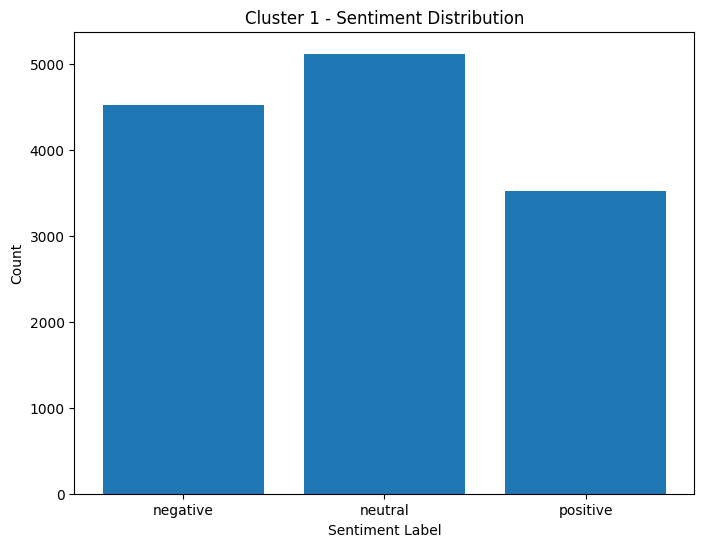

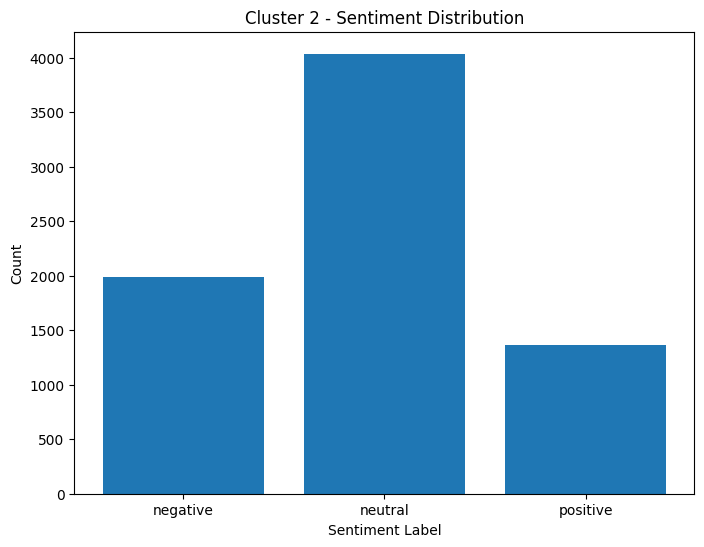

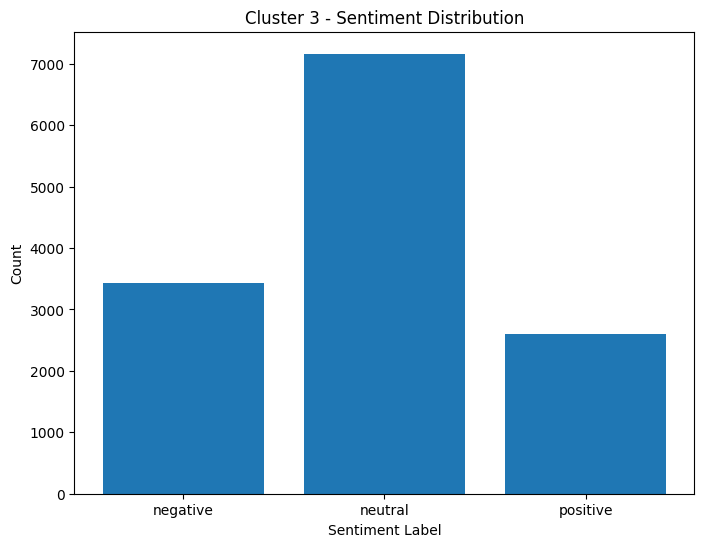

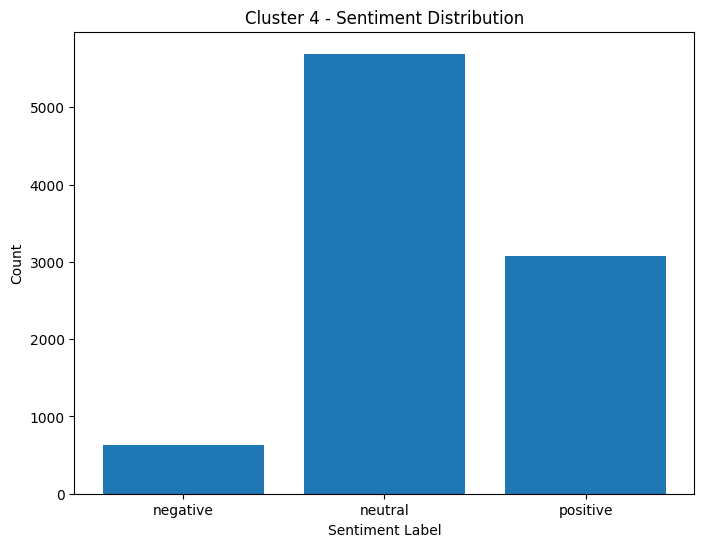

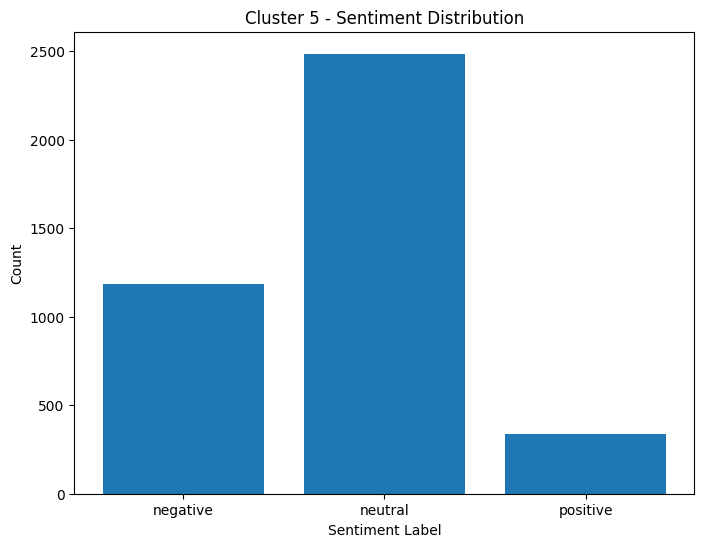

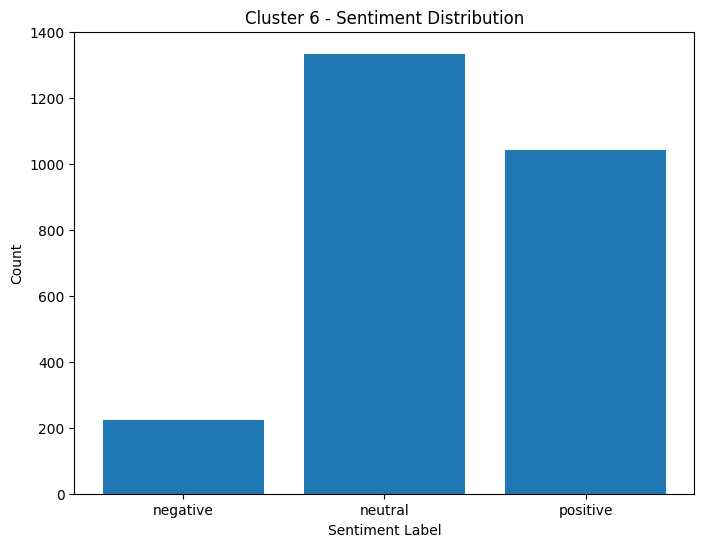

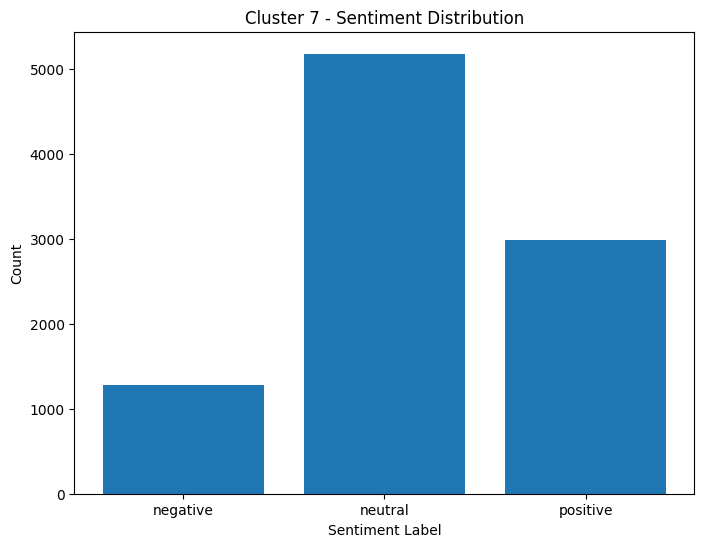

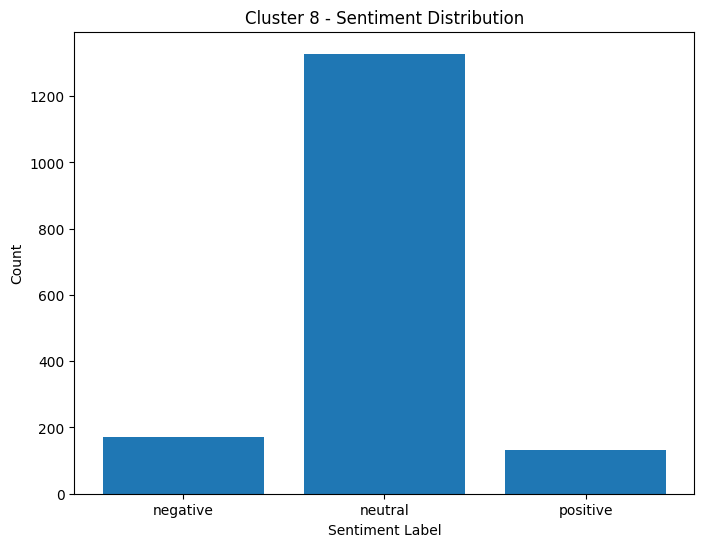

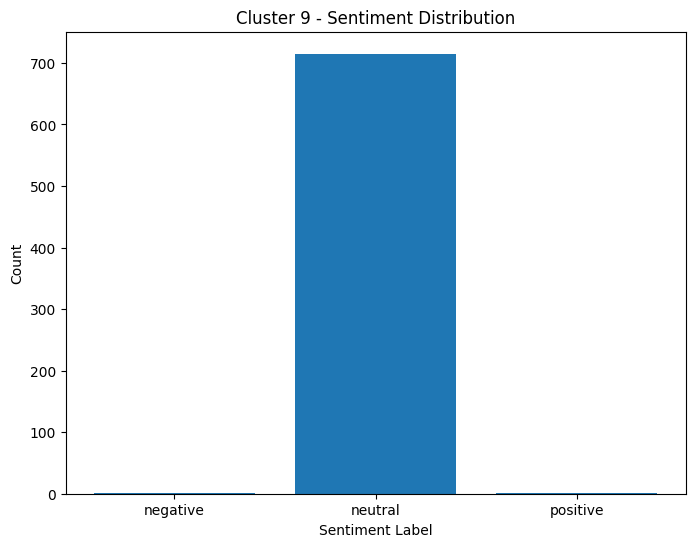

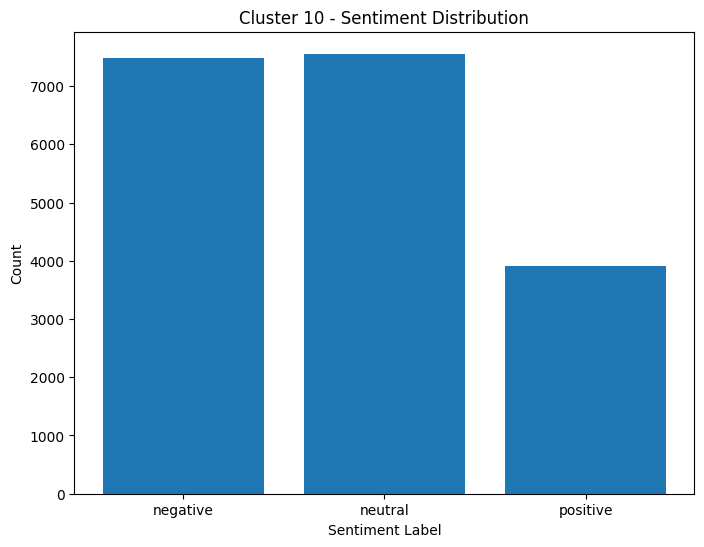

In [ ]:
for cluster_id in range(num_clusters):
    cluster_label_counts = label_counts.loc[cluster_id]
    labels = cluster_label_counts.index
    counts = cluster_label_counts.values

    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts)
    plt.xlabel('Sentiment Label')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster_id + 1} - Sentiment Distribution')
    plt.show()

<ipython-input-152-3a2818e8727b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cluster_labels, rotation=45, ha='right')


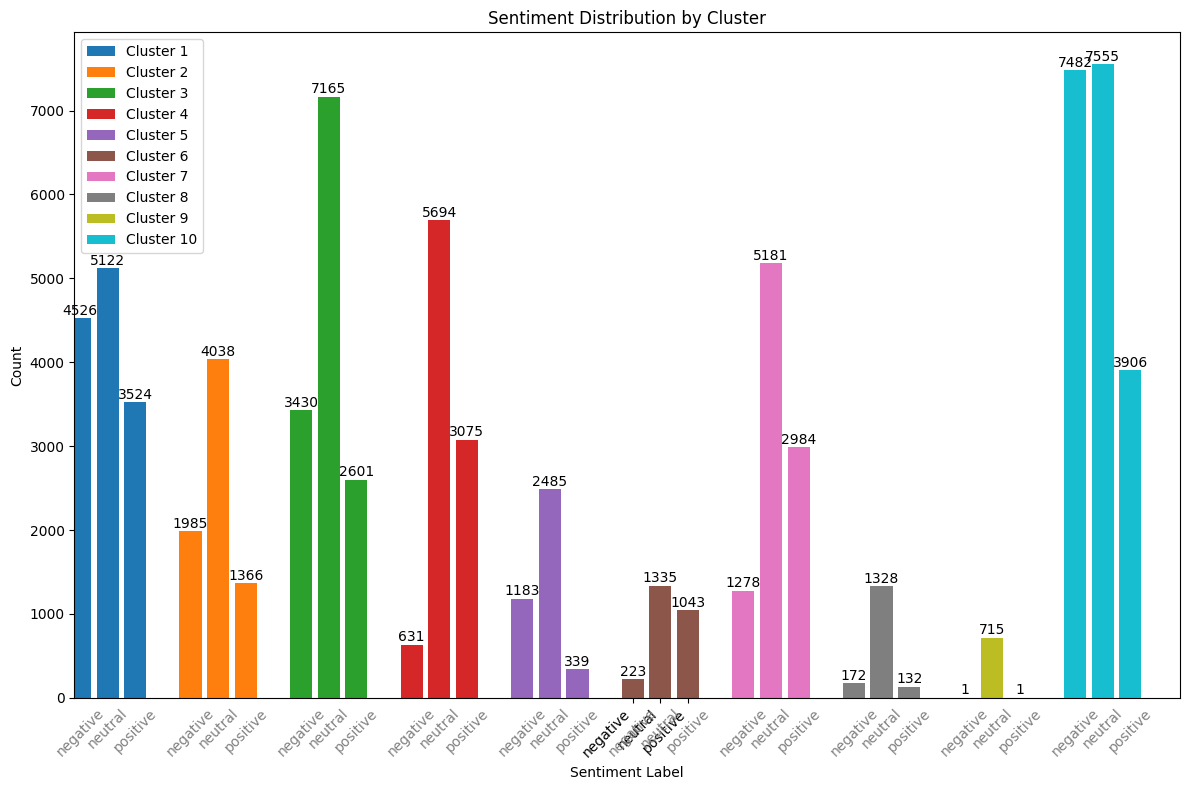

In [ ]:
# Plot the distributions of positive, negative, and neutral tweets in each cluster
sentiment_labels = ['negative', 'neutral', 'positive']
cluster_labels = range(num_clusters)

# Set up the figure and subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the bar width and the offset for each cluster
bar_width = 0.2
offset = bar_width * (len(sentiment_labels) - 1) / 2

# Iterate over clusters
for cluster_id in cluster_labels:
    # Get the label counts for the cluster
    cluster_label_counts = label_counts.loc[cluster_id]
    counts = cluster_label_counts.values

    # Compute the x-axis positions
    x_pos = np.arange(len(sentiment_labels)) + cluster_id * (len(sentiment_labels) + 1)

    # Plot the bar chart
    ax.bar(x_pos, counts, align='center', label=f'Cluster {cluster_id + 1}')
    ax.set_xticklabels(cluster_labels, rotation=45, ha='right')

    # Add labels for each bar
    for i, count in enumerate(counts):
        ax.text(x_pos[i], count + 5, str(count), ha='center', va='bottom')

    # Add cluster label
    #ax.text(np.mean(x_pos), max(counts) + 30, f'Cluster {cluster_id + 1}', ha='center', va='bottom', fontweight='bold')

     # Add bar names
    for i, sentiment_label in enumerate(sentiment_labels):
        ax.text(x_pos[i], -100, sentiment_label, ha='center', va='top', rotation=45, color='gray')
        
# Set the x-axis limits and ticks
ax.set_xlim(-offset, (len(sentiment_labels) + 1) * num_clusters - offset)
ax.set_xticks(np.arange(len(sentiment_labels)) + (len(sentiment_labels) + 1) * num_clusters / 2)
ax.set_xticklabels(sentiment_labels, rotation=45, ha='right')
ax.set_xlabel('Sentiment Label')



# Set the y-axis label
ax.set_ylabel('Count')

# Set the title and legend
ax.set_title('Sentiment Distribution by Cluster')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()